In [2]:
import sys

# project Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import kagglehub

# Download latest version of kagglehub to obtain Nasdaq data
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Path to dataset files:", path)

Path to dataset files: /Users/user/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2


In [3]:
data = pd.read_csv("http://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt", sep='|')
data_clean = data[data['Test Issue'] == 'N']
symbols = data_clean['NASDAQ Symbol'].tolist()
print('total number of symbols traded = {}'.format(len(symbols)))

total number of symbols traded = 11101


In [4]:
# Read Tmobile stock data into pandas

In [5]:
Tmobile_STK = pd.read_csv("/Users/user/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks/TMUS.csv")
Tmobile_STK

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-04-19,50.200001,55.220001,49.000000,54.799999,44.560043,15862400
1,2007-04-20,54.799999,57.599998,54.200001,57.099998,46.430264,3054700
2,2007-04-23,57.200001,57.880001,56.580002,57.500000,46.755520,1876400
3,2007-04-24,57.020000,58.799999,57.020000,58.400002,47.487347,1532900
4,2007-04-25,59.099998,59.500000,57.020000,57.220001,46.527843,1225300
...,...,...,...,...,...,...,...
3257,2020-03-26,80.000000,84.989998,79.730003,84.629997,84.629997,4821300
3258,2020-03-27,82.540001,83.900002,81.019997,81.720001,81.720001,4309600
3259,2020-03-30,82.290001,83.860001,81.239998,83.120003,83.120003,5625200
3260,2020-03-31,83.040001,84.750000,81.980003,83.900002,83.900002,6920600


In [6]:
# Drop the follwing columns from the Tmobile_STK: Low, close, Volume
Tmobile_STK_Clean= Tmobile_STK.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
Tmobile_STK_Clean.head()

,Date,Adj Close
0,2007-04-19,44.560043
1,2007-04-20,46.430264
2,2007-04-23,46.755520
3,2007-04-24,47.487347
4,2007-04-25,46.527843


In [7]:
# Read Verizon stock data into pandas
Verizon_STK = pd.read_csv("/Users/user/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks/VZ.csv")
Verizon_STK.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1983-11-21,7.939334,7.953386,7.377257,7.897178,0.301449,5020600
1,1983-11-22,7.897178,8.009593,7.855022,7.869074,0.300376,2666700
2,1983-11-23,7.869074,7.897178,7.784762,7.826919,0.298767,1151900
3,1983-11-25,7.826919,7.840971,7.742607,7.742607,0.295549,1771800
4,1983-11-28,7.700451,7.700451,7.503724,7.531828,0.287503,2367800


In [8]:
# Drop the follwing columns from the Tmobile_STK: Low, close, Volume
Verizon_STK_Clean = Verizon_STK.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
Verizon_STK_Clean.head()

,Date,Adj Close
0,1983-11-21,0.301449
1,1983-11-22,0.300376
2,1983-11-23,0.298767
3,1983-11-25,0.295549
4,1983-11-28,0.287503


In [9]:
# Merged the Tmobile_STK_Clean dataset with Verizon_STK_Clean on "Date" 
combined_stock_df = pd.merge(Tmobile_STK_Clean, Verizon_STK_Clean,
                                 how='inner', on='Date')
combined_stock_df.head()

,Date,Adj Close_x,Adj Close_y
0,2007-04-19,44.560043,18.700361
1,2007-04-20,46.430264,18.899786
2,2007-04-23,46.755520,18.720304
3,2007-04-24,47.487347,18.745234
4,2007-04-25,46.527843,18.770159


In [10]:
# Renamed "Adj Close_x" to "Tmobile_Adj_Close and "Adj Close_y" to "Verizon_Adj_Close".

combined_stock_df = combined_stock_df.rename(columns={"Adj Close_x":"Tmobile_Adj_Close"})

combined_stock_df = combined_stock_df.rename(columns={"Adj Close_y":"Verizon_Adj_Close"})

combined_stock_df.head()

,Date,Tmobile_Adj_Close,Verizon_Adj_Close
0,2007-04-19,44.560043,18.700361
1,2007-04-20,46.430264,18.899786
2,2007-04-23,46.755520,18.720304
3,2007-04-24,47.487347,18.745234
4,2007-04-25,46.527843,18.770159


In [12]:
# Read AT&T stock data into pandas
ATT_STK = pd.read_csv("/Users/user/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks/T.csv")
ATT_STK.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9161,2020-03-26,28.680000,30.959999,28.680000,30.600000,30.600000,64038000
9162,2020-03-27,29.690001,30.820000,29.219999,29.840000,29.840000,46386000
9163,2020-03-30,29.900000,30.410000,29.480000,30.230000,30.230000,41629900
9164,2020-03-31,30.040001,30.129999,29.049999,29.150000,29.150000,69813400
9165,2020-04-01,28.379999,28.580000,27.700001,28.049999,28.049999,54628900


In [14]:
# Drop the follwing columns from the AT&T_STK: Low, close, Volume
ATT_STK_Clean = ATT_STK.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
ATT_STK_Clean.head()

,Date,Adj Close
0,1983-11-21,0.216226
1,1983-11-22,0.214472
2,1983-11-23,0.213595
3,1983-11-25,0.214033
4,1983-11-28,0.211840


In [16]:
# Merged the combined_stock_df dataset with AT&T dataset on "Date" 
combined_stock_df = pd.merge(combined_stock_df, ATT_STK_Clean, how="inner", on="Date")
combined_stock_df.head()

,Date,Tmobile_Adj_Close,Verizon_Adj_Close,Adj Close
0,2007-04-19,44.560043,18.700361,19.732235
1,2007-04-20,46.430264,18.899786,20.013330
2,2007-04-23,46.755520,18.720304,19.963135
3,2007-04-24,47.487347,18.745234,19.626814
4,2007-04-25,46.527843,18.770159,19.646889


In [65]:
# Renamed "Adj Close to "ATT_Adj_Close"".
combined_stock_df = combined_stock_df.rename(columns={"Adj Close":"ATT_Adj_Close"})
combined_stock_df.tail()

,Date,Tmobile_Adj_Close,Verizon_Adj_Close,ATT_Adj_Close
3257,2020-03-26,84.629997,53.540001,30.600000
3258,2020-03-27,81.720001,52.770000,29.840000
3259,2020-03-30,83.120003,54.770000,30.230000
3260,2020-03-31,83.900002,53.730000,29.150000
3261,2020-04-01,85.129997,52.919998,28.049999


In [77]:
Tmobile_Adj_Close 

,Date,Tmobile_Adj_Close,Verizon_Adj_Close,ATT_Adj_Close
2947,2019-01-02,65.260002,53.192970,27.424492
2948,2019-01-03,65.019997,53.382877,27.461628
2949,2019-01-04,67.489998,53.515816,28.167200
2950,2019-01-07,68.440002,53.857647,28.677809
2951,2019-01-08,67.769997,55.433876,29.039883
...,...,...,...,...
3257,2020-03-26,84.629997,53.540001,30.600000
3258,2020-03-27,81.720001,52.770000,29.840000
3259,2020-03-30,83.120003,54.770000,30.230000
3260,2020-03-31,83.900002,53.730000,29.150000


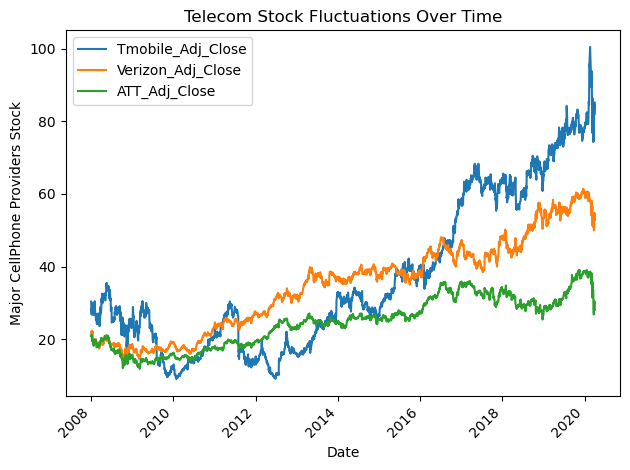

In [100]:
Tmobile_Adj_Close = combined_stock_df[combined_stock_df["Tmobile_Adj_Close"].notnull()]
Tmobile_Adj_Close = Tmobile_Adj_Close[Tmobile_Adj_Close["Date"]>="2008, 2009-04-01"]
# Assuming "Date" is already in datetime format; if not, convert it using pd.to_datetime()
Tmobile_Adj_Close["Date"] = pd.to_datetime(Tmobile_Adj_Close["Date"])

# Plotting
#plt.plot(Tmobile_Adj_Close["Date"], Tmobile_Adj_Close["Tmobile_Adj_Close"], marker='s', color='b')
Tmobile_Adj_Close.plot(x="Date")
plt.title("Telecom Stock Fluctuations Over Time")
plt.xlabel("Date")
plt.ylabel("Major CellPhone Providers Stock")
#plt.ylim(35, 50)
plt.xticks(rotation=45)  
plt.tight_layout()        
plt.show()

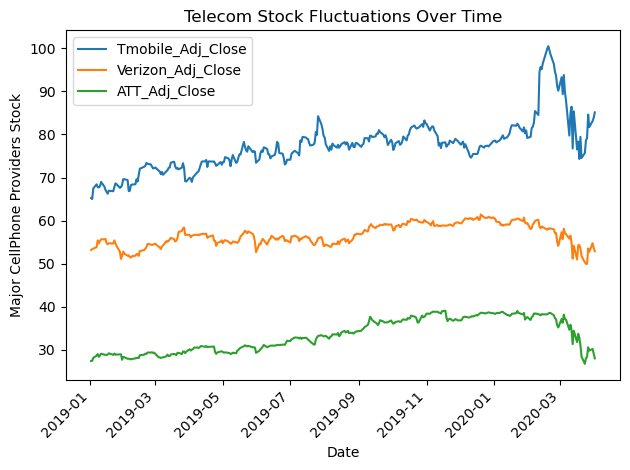

In [155]:
Tmobile_Adj_Close = combined_stock_df[combined_stock_df["Tmobile_Adj_Close"].notnull()]
Tmobile_Adj_Close = Tmobile_Adj_Close[Tmobile_Adj_Close["Date"]>="2019, 2020-04-01"]
# Assuming "Date" is already in datetime format; if not, convert it using pd.to_datetime()
Tmobile_Adj_Close["Date"] = pd.to_datetime(Tmobile_Adj_Close["Date"])

# Plotting
#plt.plot(Tmobile_Adj_Close["Date"], Tmobile_Adj_Close["Tmobile_Adj_Close"], marker='s', color='b')
Tmobile_Adj_Close.plot(x="Date")
plt.title("Telecom Stock Fluctuations Over Time")
plt.xlabel("Date")
plt.ylabel("Major CellPhone Providers Stock")
#plt.ylim(35, 50)
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


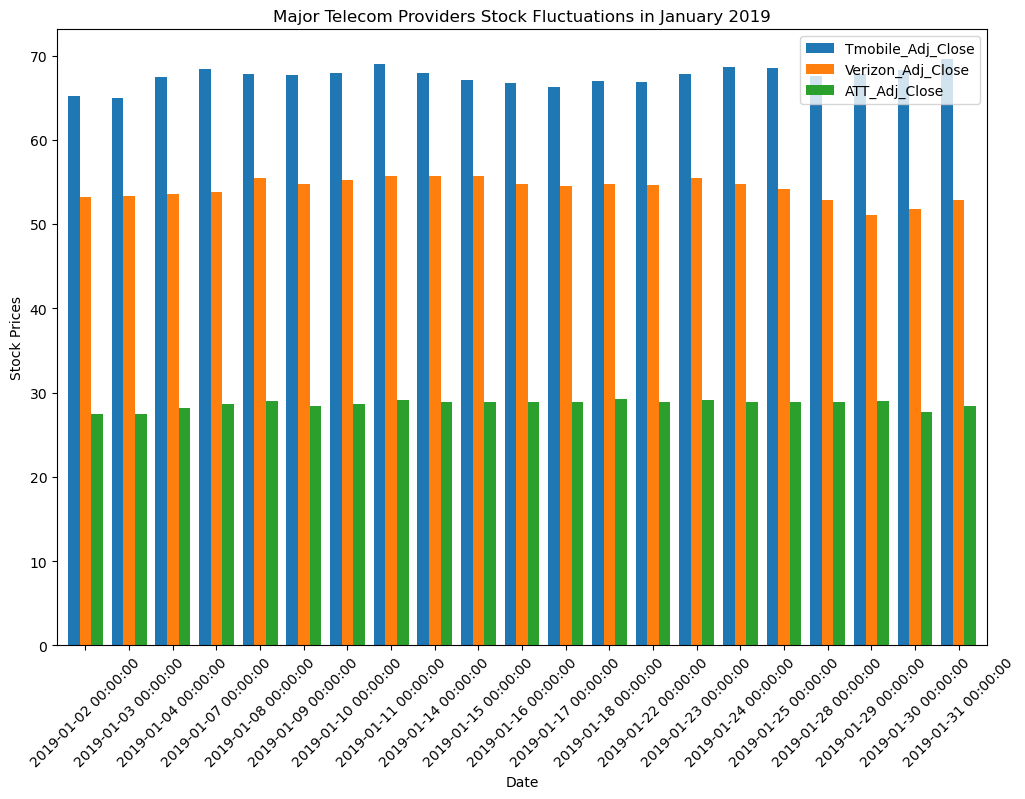

In [192]:
combined_stock_df = combined_stock_df.dropna(subset=["Tmobile_Adj_Close", "Verizon_Adj_Close", "ATT_Adj_Close"])

# Create a DataFrame for T-Mobile's adjusted close prices
Tmobile_Adj_Close = combined_stock_df[combined_stock_df["Tmobile_Adj_Close"].notnull()]

# Filter for dates in January 2019
start_date = "2019-01-01"
end_date = "2019-01-31"
filtered_df = combined_stock_df[(combined_stock_df["Date"] >= start_date) & 
                                 (combined_stock_df["Date"] <= end_date)].copy()  # Create a copy

# Convert "Date" to datetime format if it's not already
filtered_df.loc[:, "Date"] = pd.to_datetime(filtered_df["Date"])

# Set the "Date" column as the index
filtered_df.set_index("Date", inplace=True)

# Ensure that all stock columns are of numeric type
filtered_df[["Tmobile_Adj_Close", "Verizon_Adj_Close", "ATT_Adj_Close"]] = filtered_df[["Tmobile_Adj_Close", "Verizon_Adj_Close", "ATT_Adj_Close"]].apply(pd.to_numeric, errors='coerce')

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("No data available for the specified date range.")
else:
    # Create a vertical bar plot for multiple stocks
    plot1 = filtered_df[["Tmobile_Adj_Close", "Verizon_Adj_Close", "ATT_Adj_Close"]].plot.bar(
        figsize=(12, 8), width=0.8)  # Adjusting figure size and width of bars

    plot1.set_ylabel("Stock Prices")
    plot1.set_title("Major Telecom Providers Stock Fluctuations in January 2019")
    plt.xticks(rotation=45) 
    #plt.tight_layout()  
    plt.show()
